In [18]:
import numpy as np
from sklearn import neighbors 
from sklearn.metrics import mean_squared_error
#from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import neighbors 
import math


In [2]:
df = pd.read_csv('cleaned.csv').drop(['Unnamed: 0'],axis=1)
df=df.dropna()
df

,price,Address,bedroom,bathroom,size_sqf,types,city,province,Latitude,Longitude
0,1425,Poplar,1,1,533,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
1,2245,Poplar,2,2,910,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
2,1350,Abbotsford West,1,1,538,Apt/Condo,Abbotsford,BC,49.039034,-122.430243
3,1725,Poplar,1,1,689,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
4,1625,Central Abbotsford,2,1,846,Apt/Condo,Abbotsford,BC,49.050438,-122.304470
...,...,...,...,...,...,...,...,...,...,...
3234,1535,Av. Lennox,1,1,700,House,Montreal,Quebec,45.512978,-73.624023
3235,6999,Rue Sherbrooke O.,2,2,1175,House,Montreal,Quebec,45.481598,-73.600424
3236,1437,Av. Somerled,2,1,770,House,Montreal,Quebec,45.467881,-73.638234
3237,3500,Tsse St-Denis,3,2,1800,House,Montreal,Quebec,45.516377,-73.566669


# Model 1(ols) with province and without city

In [3]:
#creating training and testing datasets
df1=df.drop(columns=['Address','city','Latitude','Longitude'])# I only control for province. because adress and city are nested into province
df1['bedroom']=df1['bedroom'].astype("category") # I convert bedrooms to categorical because 
# it makes sense to think that there is not a linear relationship between 1 to 2 and 2 to 3 bedrooms places/
df1['size_sqf_q2']=df1['size_sqf']*df1['size_sqf'] 
#I added bigger places additional square feet has smaller impact on price than small places. 
df_dummies = pd.get_dummies(data=df1, drop_first=True)
training_data = df_dummies.sample(frac=0.8, random_state=25)
testing_data = df_dummies.drop(training_data.index)
training_data=training_data.reset_index(drop=True)
testing_data=testing_data.reset_index(drop=True)

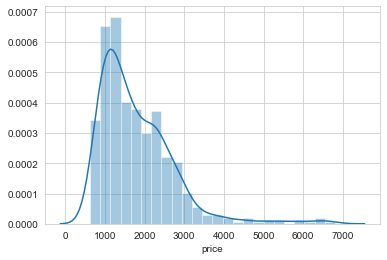

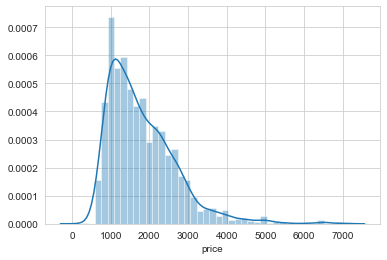

In [4]:
sns.set_style('whitegrid')
sns.distplot(testing_data['price'])
plt.show()
sns.distplot(training_data['price'])
plt.show()


As we can see our train and test dataset have similar distribution. 

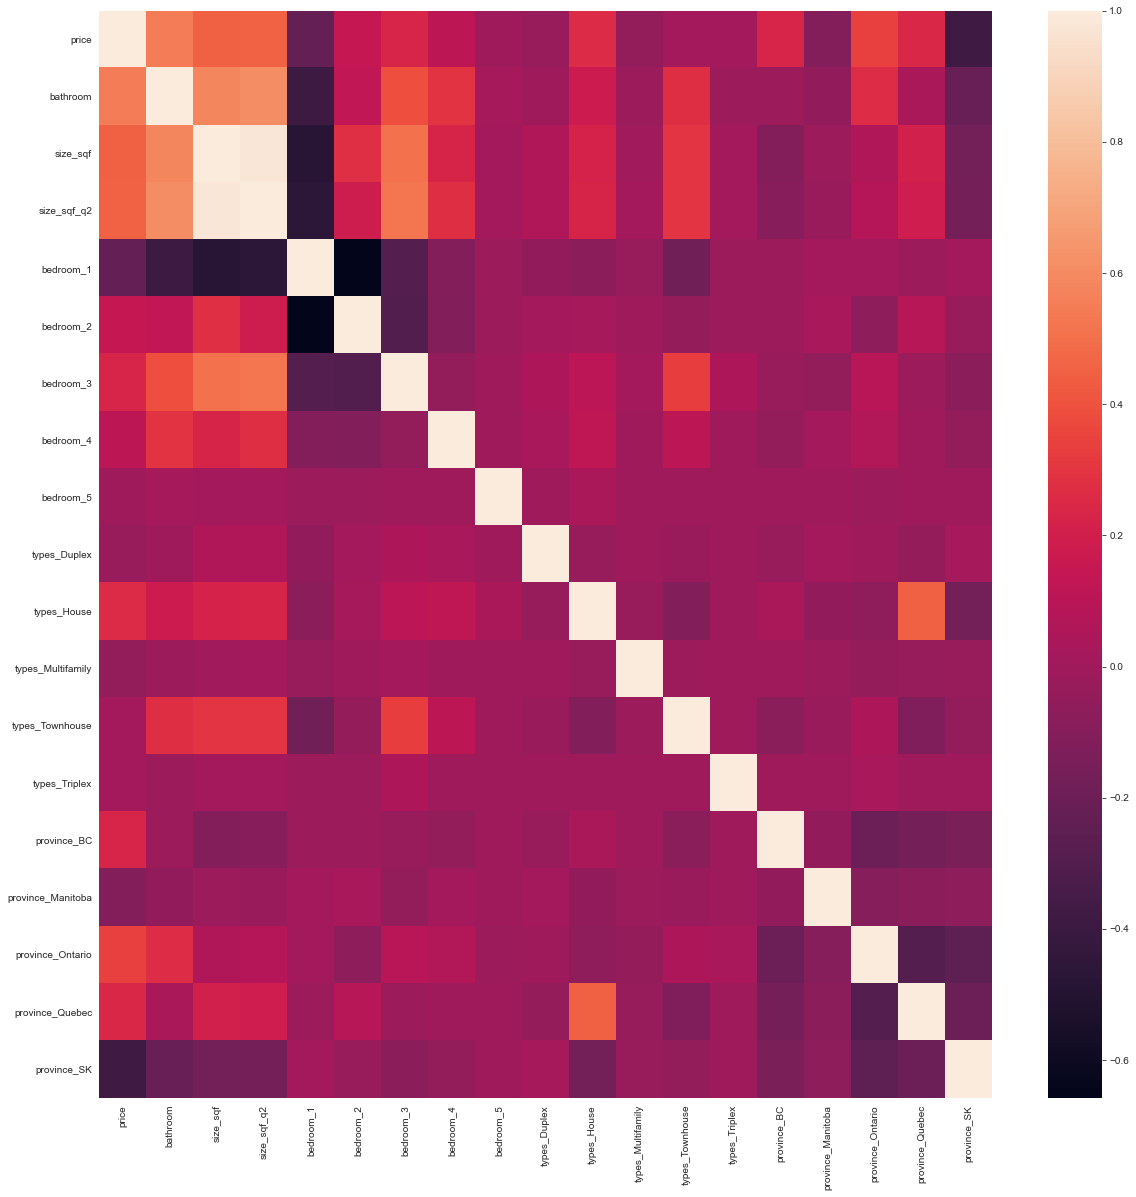

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(training_data.corr())


As we can see in the above graph, a lot of vairables in our model are correlated with each other. This may suggest that the linear regression is not a wise choice. 

In [6]:
X=training_data.drop(columns=['price'])
X= sm.add_constant(X) #adding constant to the model

Y=training_data['price']

In [7]:
model1 = sm.OLS(Y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     232.8
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:32:33   Log-Likelihood:                -19983.
No. Observations:                2591   AIC:                         4.000e+04
Df Residuals:                    2572   BIC:                         4.012e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               244.3541     93.194      2.622      0.009      61.611     427.097
bathroom            479.8755     25.984     18.468      0.000     428.924     530.827
size_sqf              0.1208      0.229      0.527      0.598      -0.329       0.570
size_sqf_q2           0.0003      0.000      2.213      0.027    2.88e-05       0.000
bedroom_1           179.2913     51.731      3.466      0.001      77.852     280.731
bedroom_2           280.5753     62.490      4.490      0.000     158.039     403.111
bedroom_3           230.7106     75.045      3.074      0.002      83.556     377.865
bedroom_4            15.8995    110.001      0.145      0.885    -199.800     231.599
bedroom_5           280.7573    548.951      0.511      0.609    -795.674    1357.188
types_Duplex       -166.1163    141.912     -1.171      0.242    -444.391     112.158
types_House         -39.5742     34.450     -1.149      0.251    -107.126      27.978
types_Multifamily  -274.4487    173.756     -1.580      0.114    -615.164      66.267
types_Townhouse    -296.2733     49.582     -5.975      0.000    -393.498    -199.049
types_Triplex       329.8705    545.129      0.605      0.545    -739.066    1398.807
province_BC        1138.5359     40.898     27.839      0.000    1058.341    1218.731
province_Manitoba     5.0052     69.368      0.072      0.942    -131.018     141.029
province_Ontario    827.3425     30.696     26.953      0.000     767.152     887.533
province_Quebec     793.5945     36.546     21.715      0.000     721.932     865.257
province_SK        -137.1986     35.304     -3.886      0.000    -206.426     -67.971
==============================================================================
Omnibus:                     1332.720   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15584.511
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                      14.210   Cond. No.                     4.69e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square in our model is 0.552 which means the model explain 55 percent of variation in rental price

<ipython-input-8-e0b1512c5b1c>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


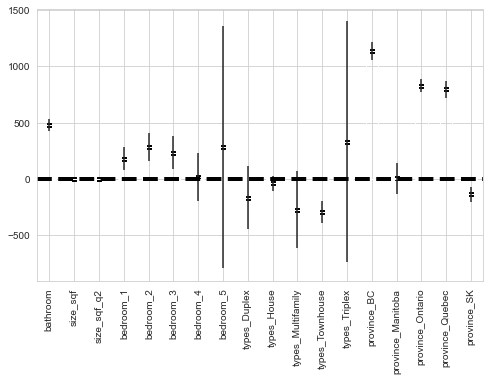

In [8]:
err_series = model1.params - model1.conf_int()[0] ##calculating error bar length
coef_df = pd.DataFrame({'coef': model1.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=10, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')


The above graph shows the impact of different independent variables on rental price. as we can see, 1 bedroom, 2 bedrooms and 3 bedrooms places are more expensive that 0 bedroom places, holding other variables constant. Furthermore, rentals in BC, Ontario and Quebec are more expensive than the omitted category (Alberta). The coefficients of  Manitoba are not significant (at 1 percent level). Therefore, there is no price in the rental price in this provinces and Alberta.However, rentals in Saskatchewan is cheaper than Alberta. Regarding the rental type, it is clear that only townhouses are cheaper than appartments. Therefore, there is no difference between other types of places and the omitted category(price)

In [9]:
# evaluating the model by the test dataset
X_test=testing_data.drop(columns=['price'])
X_test= sm.add_constant(X_test) #adding constant to the model
Y_test=testing_data['price']
y_hat=model1.predict(X_test)
print('The mean square error for the test sample in the first model is %.2f' %mean_squared_error(Y_test, y_hat))

The mean square error for the test sample in the first model is 367961.20


# Model 2(ols) with city and without province

In [10]:
#creating training and testing datasets
df1=df.drop(columns=['Address','province','Latitude','Longitude'])# I only control for province. because adress and city are nested into province
df1['bedroom']=df1['bedroom'].astype("category") # I convert bedrooms to categorical because 
# it makes sense to think that there is not a linear relationship between 1 to 2 and 2 to 3 bedrooms places/
df1['size_sqf_q2']=df1['size_sqf']*df1['size_sqf'] 
#I added bigger places additional square feet has smaller impact on price than small places. 
df_dummies = pd.get_dummies(data=df1, drop_first=True)
training_data = df_dummies.sample(frac=0.8, random_state=25)
testing_data = df_dummies.drop(training_data.index)
training_data=training_data.reset_index(drop=True)
testing_data=testing_data.reset_index(drop=True)

In [11]:
X=training_data.drop(columns=['price'])
X= sm.add_constant(X) #adding constant to the model
Y=training_data['price']
model2 = sm.OLS(Y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:32:34   Log-Likelihood:                -19729.
No. Observations:                2591   AIC:                         3.954e+04
Df Residuals:                    2550   BIC:                         3.978e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  425.9321    121.378      3.509      0.000     187.923     663.941
bathroom               431.5865     24.104     17.905      0.000     384.321     478.852
size_sqf                 0.3004      0.212      1.415      0.157      -0.116       0.717
size_sqf_q2              0.0002      0.000      2.064      0.039    1.08e-05       0.000
bedroom_1              159.4670     47.631      3.348      0.001      66.068     252.866
bedroom_2              260.4113     57.645      4.518      0.000     147.376     373.447
bedroom_3              270.0884     69.338      3.895      0.000     134.123     406.054
bedroom_4              165.5336    101.733      1.627      0.104     -33.954     365.021
bedroom_5              367.1888    500.222      0.734      0.463    -613.694    1348.072
types_Duplex           -48.6748    130.970     -0.372      0.710    -305.493     208.144
types_House              2.5790     32.320      0.080      0.936     -60.798      65.956
types_Multifamily     -265.6309    158.738     -1.673      0.094    -576.899      45.637
types_Townhouse       -243.8801     45.758     -5.330      0.000    -333.606    -154.154
types_Triplex           85.8404    497.275      0.173      0.863    -889.263    1060.944
city_Brampton          102.4999    116.472      0.880      0.379    -125.890     330.890
city_Burnaby          1099.9712    164.958      6.668      0.000     776.507    1423.436
city_Calgary           -38.0475     93.863     -0.405      0.685    -222.103     146.008
city_Edmonton         -363.7971     93.952     -3.872      0.000    -548.026    -179.568
city_For_Mcmurray     -168.3040    163.685     -1.028      0.304    -489.274     152.666
city_Grande_prairie   -469.3808    109.408     -4.290      0.000    -683.919    -254.843
city_Hamilton          328.3105    111.113      2.955      0.003     110.430     546.191
city_Lethbridge       -354.9462    140.167     -2.532      0.011    -629.799     -80.093
city_London            -56.8014    161.278     -0.352      0.725    -373.051     259.448
city_Montreal          533.9013     93.365      5.718      0.000     350.823     716.980
city_Moose_jaw        -451.3459    299.267     -1.508      0.132   -1038.177     135.485
city_New_westminster   543.6552    238.893      2.276      0.023      75.211    1012.100
city_Oshawa            187.8530    169.498      1.108      0.268    -144.514     520.220
city_Ottowa            430.0507    103.457      4.157      0.000     227.183     632.919
city_Red_deer         -442.1617    130.558     -3.387      0.001    -698.173    -186.150
city_Regina           -335.5210     97.034     -3.458      0.001    -525.795    -145.247
city_Saskatoon        -370.6230     96.259     -3.850      0.000    -559.377    -181.869
city_Surrey            202.2806    118.823      1.702    

<ipython-input-12-6460c5c30d45>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


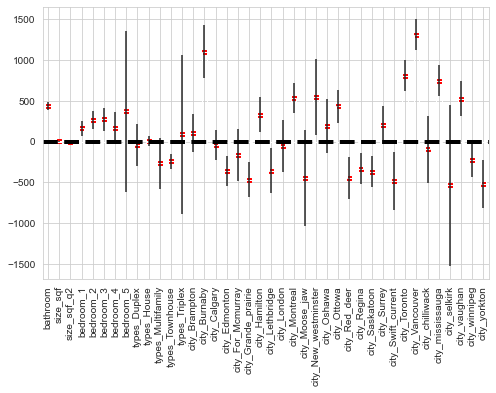

In [12]:
err_series = model2.params - model2.conf_int()[0] ##calculating error bar length
coef_df = pd.DataFrame({'coef': model2.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=10, 
           y=coef_df['coef'], color='red')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')


The above graph shows the impact of different independent variables on the rental price. as we can see,  Vancouver is the most expensive city for rentals in Canada. On average, rentals located in Vancouver are $1303 more expensive than rentals in Abbotsford. Furthermore, rentals located in Toronto are cheaper than Vancouver but more expensive than Abbotsford

In [13]:
# evaluating the model by the test dataset
X_test=testing_data.drop(columns=['price'])
X_test= sm.add_constant(X_test) #adding constant to the model
Y_test=testing_data['price']
y_hat=model2.predict(X_test)
print('The mean square error for the test sample in the first model is %.2f' %mean_squared_error(Y_test, y_hat))

The mean square error for the test sample in the first model is 300058.69


The model 2 has smaller means square error

# log transformation

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
training_data['price']=np.log1p(training_data["price"])
testing_data['price']=np.log1p(testing_data["price"])


In [15]:
X=training_data.drop(columns=['price'])
X= sm.add_constant(X) #adding constant to the model
Y=training_data['price']
model2 = sm.OLS(Y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:35:41   Log-Likelihood:                 489.40
No. Observations:                2591   AIC:                            -896.8
Df Residuals:                    2550   BIC:                            -656.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.5543      0.050    132.207      0.000       6.457       6.652
bathroom                 0.1724      0.010     17.507      0.000       0.153       0.192
size_sqf                 0.0006   8.67e-05      7.014      0.000       0.000       0.001
size_sqf_q2          -1.342e-07    4.3e-08     -3.120      0.002   -2.18e-07   -4.99e-08
bedroom_1                0.1192      0.019      6.127      0.000       0.081       0.157
bedroom_2                0.1649      0.024      7.005      0.000       0.119       0.211
bedroom_3                0.1913      0.028      6.753      0.000       0.136       0.247
bedroom_4                0.2024      0.042      4.870      0.000       0.121       0.284
bedroom_5                0.3937      0.204      1.927      0.054      -0.007       0.794
types_Duplex             0.0388      0.053      0.725      0.468      -0.066       0.144
types_House             -0.0073      0.013     -0.555      0.579      -0.033       0.019
types_Multifamily       -0.1612      0.065     -2.486      0.013      -0.288      -0.034
types_Townhouse         -0.0786      0.019     -4.208      0.000      -0.115      -0.042
types_Triplex            0.0166      0.203      0.082      0.935      -0.382       0.415
city_Brampton            0.1204      0.048      2.531      0.011       0.027       0.214
city_Burnaby             0.5015      0.067      7.444      0.000       0.369       0.634
city_Calgary            -0.0405      0.038     -1.057      0.290      -0.116       0.035
city_Edmonton           -0.2525      0.038     -6.581      0.000      -0.328      -0.177
city_For_Mcmurray       -0.1099      0.067     -1.644      0.100      -0.241       0.021
city_Grande_prairie     -0.3267      0.045     -7.312      0.000      -0.414      -0.239
city_Hamilton            0.2145      0.045      4.727      0.000       0.126       0.303
city_Lethbridge         -0.2994      0.057     -5.230      0.000      -0.412      -0.187
city_London              0.0658      0.066      0.999      0.318      -0.063       0.195
city_Montreal            0.2792      0.038      7.321      0.000       0.204       0.354
city_Moose_jaw          -0.4693      0.122     -3.840      0.000      -0.709      -0.230
city_New_westminster     0.3108      0.098      3.186      0.001       0.119       0.502
city_Oshawa              0.1556      0.069      2.248      0.025       0.020       0.291
city_Ottowa              0.2547      0.042      6.028      0.000       0.172       0.338
city_Red_deer           -0.3572      0.053     -6.698      0.000      -0.462      -0.253
city_Regina             -0.2970      0.040     -7.495      0.000      -0.375      -0.219
city_Saskatoon          -0.3228      0.039     -8.210      0.000      -0.400      -0.246
city_Surrey              0.1452      0.049      2.991    

In [17]:
# evaluating the model by the test dataset
X_test=testing_data.drop(columns=['price'])
X_test= sm.add_constant(X_test) #adding constant to the model
Y_test=testing_data['price']
y_hat=model2.predict(X_test)
print('The mean square error for the test sample in the third model is %.2f' %mean_squared_error(Y_test, y_hat))

The mean square error for the test sample in the third model is 0.04


In [19]:
print(math.exp(mean_squared_error(Y_test, y_hat)))


1.0435662996631596


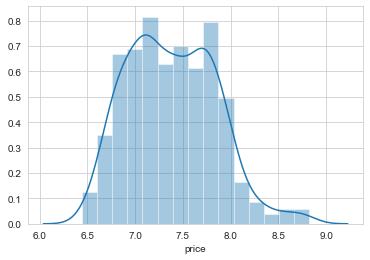

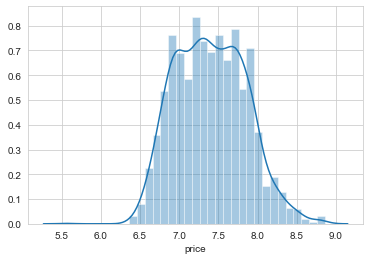

In [20]:
sns.set_style('whitegrid')
sns.distplot(testing_data['price'])
plt.show()
sns.distplot(training_data['price'])
plt.show()
